# Analysing offensive play of key FCB players

Following Messi's transfer to PSG, where he will be playing with Neymar, I decided to analyse a match from La Liga when Messi and Neymar played together for Barcelona.
This is my first project in football analytics, where I will be analysing and visualizing the playing styles of L. Messi, Neymar Jr, and Andres Iniesta.
We will also take a look at chances created and important passes.

## Libraries used
- [statsbombpy](https://github.com/statsbomb/statsbombpy) to get event data.
- [pandas](https://pandas.pydata.org/) to explore and manipulate event data.
- [seaborn](https://seaborn.pydata.org/) to plot heatmaps.
- [matplotlib](https://matplotlib.org/) to visualise the data.
- [mplsoccer](https://mplsoccer.readthedocs.io/) to plot the pitch.

In [72]:
from statsbombpy import sb
import seaborn as sns

## Taking a look at competitions

We will be using StatsBomb open data which has event records for many major leagues. No credentials are needed to use the open data.

In [73]:
sb.competitions()

credentials were not supplied. open data access only


,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2021-05-19T08:38:06.515138,2021-05-19T08:38:06.515138
1,16,1,Europe,Champions League,male,2017/2018,2021-01-23T21:55:30.425330,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


Let's choose the 2015-16 season of Spanish La Liga.

In [74]:
sb.matches(competition_id=11, season_id=27)

credentials were not supplied. open data access only


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
0,267533,2016-04-02,20:30:00.000,Spain - La Liga,2015/2016,Barcelona,Real Madrid,1,2,available,unscheduled,2020-07-29T05:00,None,31,Regular Season,Camp Nou,A. Hernández,1.1.0,2,2
1,266310,2016-04-20,20:00:00.000,Spain - La Liga,2015/2016,Deportivo La Coruna,Barcelona,0,8,available,unscheduled,2020-07-29T05:00,None,34,Regular Season,Estadio Abanca-Riazor,R. De Burgos,1.1.0,2,2
2,266498,2016-03-12,16:00:00.000,Spain - La Liga,2015/2016,Barcelona,Getafe,6,0,available,unscheduled,2020-07-29T05:00,None,29,Regular Season,Camp Nou,Pedro Pérez,1.1.0,2,2
3,267576,2016-01-30,16:00:00.000,Spain - La Liga,2015/2016,Barcelona,Atlético Madrid,2,1,available,unscheduled,2020-07-29T05:00,None,22,Regular Season,Camp Nou,Alberto Undiano,1.1.0,2,2
4,266653,2016-03-03,21:00:00.000,Spain - La Liga,2015/2016,Rayo Vallecano,Barcelona,1,5,available,unscheduled,2020-07-29T05:00,None,27,Regular Season,Estadio de Vallecas,I. Bikandi,1.1.0,2,2
5,265944,2016-04-23,20:30:00.000,Spain - La Liga,2015/2016,Barcelona,Sporting Gijón,6,0,available,unscheduled,2020-07-29T05:00,None,35,Regular Season,Camp Nou,Clos Gómez,1.1.0,2,2
6,265894,2016-01-23,16:00:00.000,Spain - La Liga,2015/2016,Málaga,Barcelona,1,2,available,unscheduled,2020-07-29T05:00,None,21,Regular Season,Estadio La Rosaleda,Clos Gómez,1.1.0,2,2
7,265958,2016-05-08,17:00:00.000,Spain - La Liga,2015/2016,Barcelona,Espanyol,5,0,available,unscheduled,2020-07-29T05:00,None,37,Regular Season,Camp Nou,Jesús Gil,1.1.0,2,2
8,267611,2015-09-26,16:00:00.000,Spain - La Liga,2015/2016,Barcelona,Las Palmas,2,1,available,unscheduled,2020-07-29T05:00,None,6,Regular Season,Camp Nou,R. De Burgos,1.1.0,2,2
9,267422,2015-08-29,20:30:00.000,Spain - La Liga,2015/2016,Barcelona,Málaga,1,0,available,unscheduled,2020-07-29T05:00,None,2,Regular Season,Camp Nou,S. Jaime,1.1.0,2,2


Here I chose the match between Real Madrid and Barcelona, which was played on 21 Nov, 2015.
It was played at Santiago Bernabéu. Barcelona won this match by 4-0.

In [75]:
events = sb.events(match_id=266424)

credentials were not supplied. open data access only


The event data has very detailed attributes for the events that take place.
Documentation for the event data can be found [here](https://github.com/statsbomb/statsbombpy/blob/master/doc/StatsBomb%20Open%20Data%20Specification%20v1.1.pdf)

In [76]:
events.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_save_block', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_deflected', 'pass_end_location', 'pass_goal_assist',
    

Let's modify our events dataframe to contain only the columns that we are interested in:

In [77]:
events = events[['team', 'type', 'player', 'location', 'minute', 'pass_end_location', 'pass_recipient', 'shot_outcome', 'pass_outcome', 'carry_end_location', 'position']].reset_index()

In [78]:
#Taking a look at the first five events.
events.head()

,index,team,type,player,location,minute,pass_end_location,pass_recipient,shot_outcome,pass_outcome,carry_end_location,position
0,0,Real Madrid,Starting XI,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Barcelona,Starting XI,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Real Madrid,Half Start,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Barcelona,Half Start,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Barcelona,Half Start,NaN,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN


Here we import the graphing libraries and initialize our pitch. Note that we have to specify the pitch_type as 'statsbomb' for the pitch to match the co-ordinates from the StatsBomb data.

In [79]:
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

pitch = Pitch(pitch_color='#22312b', line_color='white', pitch_type='statsbomb', constrained_layout=False)

The events are currently not sorted, so we sort the dataframe by the 'minute' column. This arranges the events from the kickoff to the match-end.

In [80]:
events = events.sort_values(by=['minute'])

In [81]:
events.reset_index(inplace=True)

In [82]:
events.drop(['level_0', 'index'], axis=1, inplace=True)

StatsBomb has recently introduced a new event type, called 'Carry'. 
According to the [documentation](https://github.com/statsbomb/statsbombpy/blob/master/doc/StatsBomb%20Open%20Data%20Specification%20v1.1.pdf), a 'Carry' is an event where "A player controls the ball at their feet while moving or standing still." 
This feature will later help us understand and visualise the areas of play.

The 'location' column contains list of x and y locations of he player at the time when the event occured. Let's convert the x and y locations into separate columns/features. 

In [83]:
carries = events[events['type'] == 'Carry'][['team', 'player', 'location', 'carry_end_location']]

carries['carry_start_x'] = carries['location'].apply(lambda x: (x[0]))
carries['carry_start_y'] = carries['location'].apply(lambda y: (y[1]))
carries['carry_end_x'] = carries['carry_end_location'].apply(lambda x: (x[0]))
carries['carry_end_y'] = carries['carry_end_location'].apply(lambda y: (y[1]))

Performing the same for the passes:

In [84]:
passes = events[events['type'] == 'Pass'][['team', 'player', 'location', 'pass_end_location']]

passes['pass_start_x'] = passes['location'].apply(lambda x: (x[0]))
passes['pass_start_y'] = passes['location'].apply(lambda y: (y[1]))
passes['pass_end_x'] = passes['pass_end_location'].apply(lambda x: (x[0]))
passes['pass_end_y'] = passes['pass_end_location'].apply(lambda y: (y[1]))

Separating the events teamwise

In [85]:
barcelona_events = events[events['team'] == "Barcelona"]

In [86]:
barcelona_events.reset_index(inplace=True)
barcelona_events.drop(['index'], axis=1, inplace=True)

C:\Users\swanand\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Barcelona goals:

In [87]:
barcelona_events[(barcelona_events['type'] == "Shot") & (barcelona_events['shot_outcome'] == "Goal")]

,team,type,player,location,minute,pass_end_location,pass_recipient,shot_outcome,pass_outcome,carry_end_location,position
362,Barcelona,Shot,Luis Alberto Suárez Díaz,"[106.1, 46.6]",10,NaN,NaN,Goal,NaN,NaN,Center Forward
1019,Barcelona,Shot,Neymar da Silva Santos Junior,"[113.6, 29.0]",38,NaN,NaN,Goal,NaN,NaN,Left Wing
1443,Barcelona,Shot,Andrés Iniesta Luján,"[103.2, 46.6]",52,NaN,NaN,Goal,NaN,NaN,Left Center Midfield
1885,Barcelona,Shot,Luis Alberto Suárez Díaz,"[108.7, 45.7]",73,NaN,NaN,Goal,NaN,NaN,Center Forward


### Analysing Neymar's 38' goal

Here the play was made from the central midfield, right through Madrid's defensive center

Here we see that Andres Iniesta is heavily involved in the build up play, and frequently creates assists.

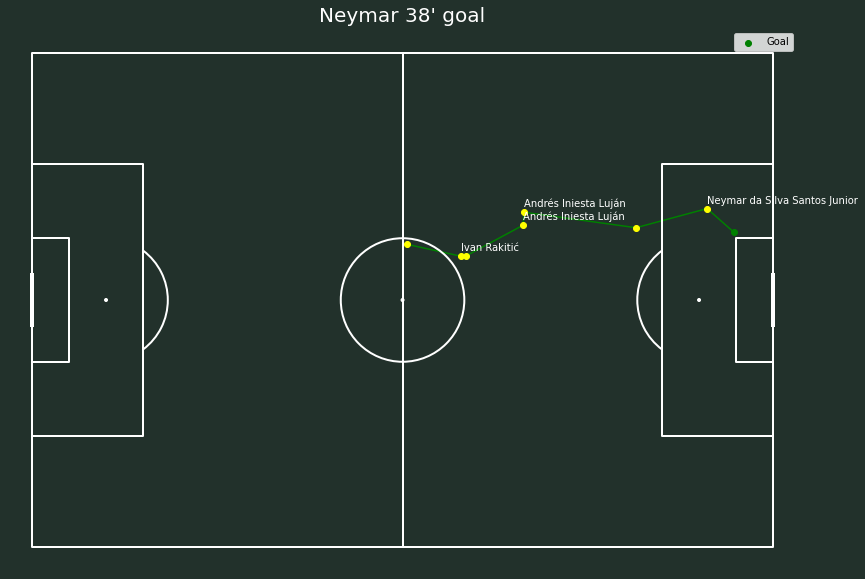

In [88]:
fig ,ax = plt.subplots(figsize=(16,10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Draw the pitch on the ax figure
pitch.draw(ax=ax)

for index, row in barcelona_events.iloc[1008:1020].iterrows():
    if row['type'] == 'Carry':
        plt.plot((row['location'][0], row['carry_end_location'][0]), (row['location'][1], row['carry_end_location'][1]), color='green', zorder=0)
        plt.scatter(row['location'][0], row['location'][1], color='yellow', zorder=1)
        plt.annotate(f"{row['player']}", xy=(row['location'][0], row['location'][1]-0.8), color='white')
    if row['type'] == 'Pass':
        plt.plot((row['location'][0], row['pass_end_location'][0]), (row['location'][1], row['pass_end_location'][1]), color='green', zorder=0)
        plt.scatter(row['location'][0], row['location'][1], color='yellow', zorder=1)
        #plt.annotate(f"{row['player']}", xy=(row['location'][0], row['location'][1]+0.8), color='white')
    if row['type'] == 'Shot':
        plt.scatter(row['location'][0], row['location'][1], color='green', label="Goal")

plt.title("Neymar 38' goal", color='white', size=20)
plt.legend()

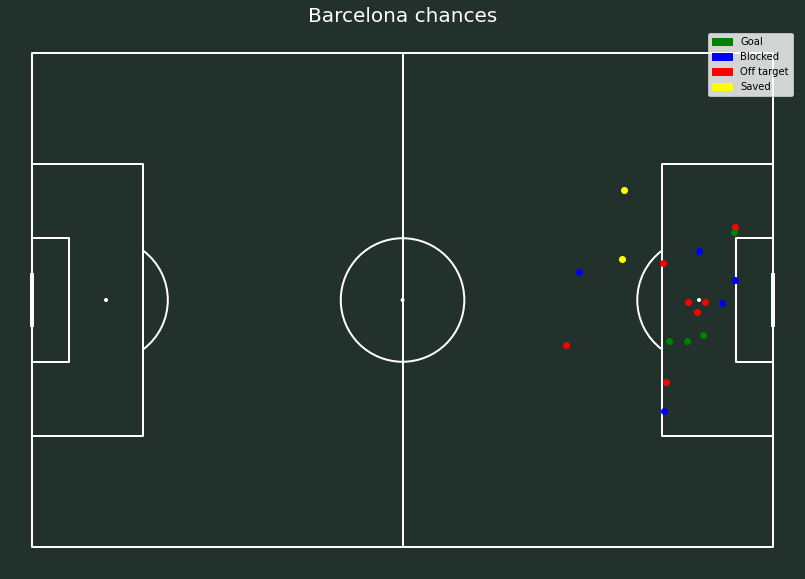

In [89]:
barcelona_shots = events[(events['team'] == 'Barcelona') & (events['type'] == 'Shot')][['player','minute','location', 'shot_outcome']]

fig ,ax = plt.subplots(figsize=(16,10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Draw the pitch on the ax figure
pitch.draw(ax=ax)

for index, row in barcelona_shots.iterrows():
    if row['shot_outcome'] == 'Goal':
        plt.scatter(row['location'][0], row['location'][1], color='green', zorder=10)
    if row['shot_outcome'] == 'Saved':
        plt.scatter(row['location'][0], row['location'][1], color='yellow')
    if row['shot_outcome'] == 'Blocked':
        plt.scatter(row['location'][0], row['location'][1], color='blue')
    if row['shot_outcome'] == 'Off T':
        plt.scatter(row['location'][0], row['location'][1], color='red')


red_patch = mpatches.Patch(color='red', label='Off target')
blue_patch = mpatches.Patch(color='blue', label='Blocked')
green_patch = mpatches.Patch(color='green', label='Goal')
yellow_patch = mpatches.Patch(color='yellow', label='Saved')

plt.title("Barcelona chances", color='white', size=20)
plt.legend(handles=[green_patch, blue_patch, red_patch, yellow_patch])

Although Real Madrid had more clear chances at the goal, they were unable to convert them.

Great goalkeeping by Barca's keeper.

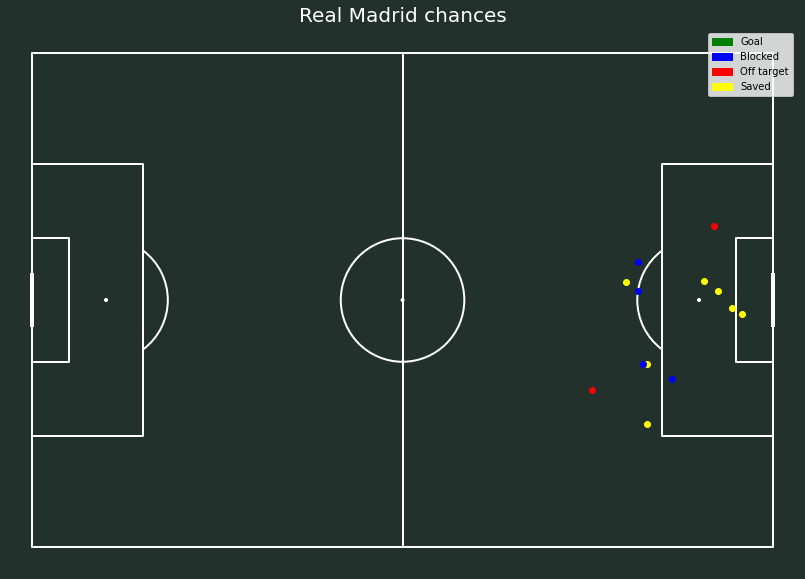

In [90]:
madrid_shots = events[(events['team'] == 'Real Madrid') & (events['type'] == 'Shot')][['player','minute','location', 'shot_outcome']]

fig ,ax = plt.subplots(figsize=(16,10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Draw the pitch on the ax figure
pitch.draw(ax=ax)


for index, row in madrid_shots.iterrows():
    if row['shot_outcome'] == 'Goal':
        plt.scatter(row['location'][0], row['location'][1], color='green', label='Goal')
    if row['shot_outcome'] == 'Saved':
        plt.scatter(row['location'][0], row['location'][1], color='yellow',  label='Saved')
    if row['shot_outcome'] == 'Blocked':
        plt.scatter(row['location'][0], row['location'][1], color='blue', label='Blocked')
    if row['shot_outcome'] == 'Off T':
        plt.scatter(row['location'][0], row['location'][1], color='red', label='Off target')
    

plt.title("Real Madrid chances", color='white', size=20)
plt.legend(handles=[green_patch, blue_patch, red_patch, yellow_patch])


## Analysing individual play styles

1. Andres Iniesta: Left Center Midfielder

Text(0.5, 1.0, 'Iniesta passes')

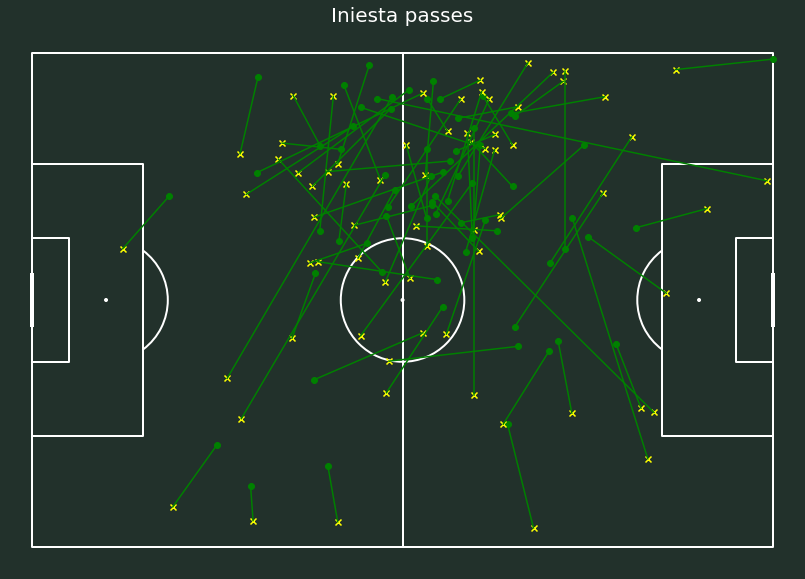

In [91]:
# Getting all passes by Iniesta
iniesta_passes = passes[passes['player'] == "Andrés Iniesta Luján"]

fig ,ax = plt.subplots(figsize=(16,10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Draw the pitch on the ax figure
pitch.draw(ax=ax)

#Plotting the pass
plt.plot((iniesta_passes['pass_start_x'],iniesta_passes['pass_end_x']), (iniesta_passes['pass_start_y'], iniesta_passes['pass_end_y']), color='green')
plt.scatter(iniesta_passes['pass_start_x'], iniesta_passes['pass_start_y'], color='green')
plt.scatter(iniesta_passes['pass_end_x'], iniesta_passes['pass_end_y'], color='yellow', marker='x')

plt.title("Iniesta passes", color='white', size=20)

As seen in the visualization above, Iniesta dominates the Left Midfield with short passes. He will also frequently link up with Neymar on the left wing.

Text(0.5, 1.0, 'Iniesta carries')

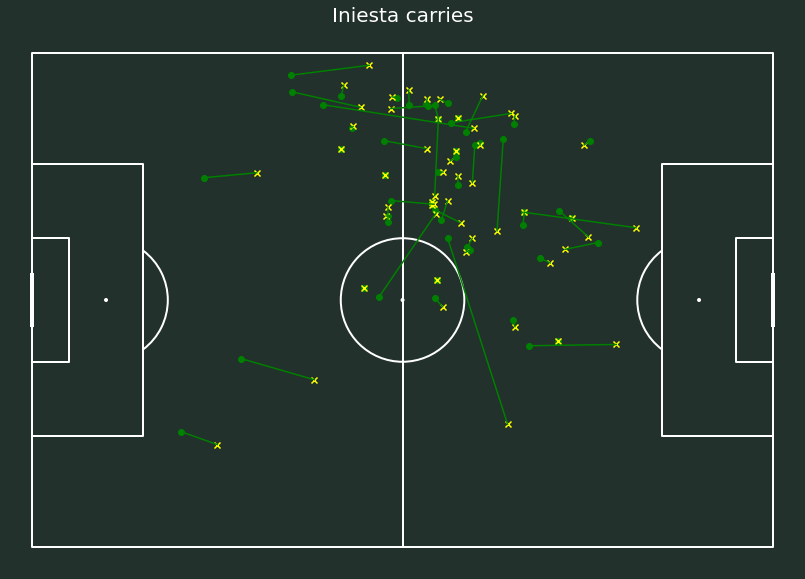

In [92]:
iniesta_carries = carries[(carries['team'] == 'Barcelona') & (carries['player'] == "Andrés Iniesta Luján")]

fig ,ax = plt.subplots(figsize=(16,10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Draw the pitch on the ax figure
pitch.draw(ax=ax)

plt.plot((iniesta_carries['carry_start_x'],iniesta_carries['carry_end_x']), (iniesta_carries['carry_start_y'], iniesta_carries['carry_end_y']), color='green')
plt.scatter(iniesta_carries['carry_start_x'], iniesta_carries['carry_start_y'], color='green')
plt.scatter(iniesta_carries['carry_end_x'], iniesta_carries['carry_end_y'], color='yellow', marker='x')

plt.title("Iniesta carries", color='white', size=20)

Iniesta retains the control of the ball, but generally performs a short pass.
But, he can and will perform dribbles into the box through the opponent's defence.

Text(0.5, 1.0, 'Messi passes')

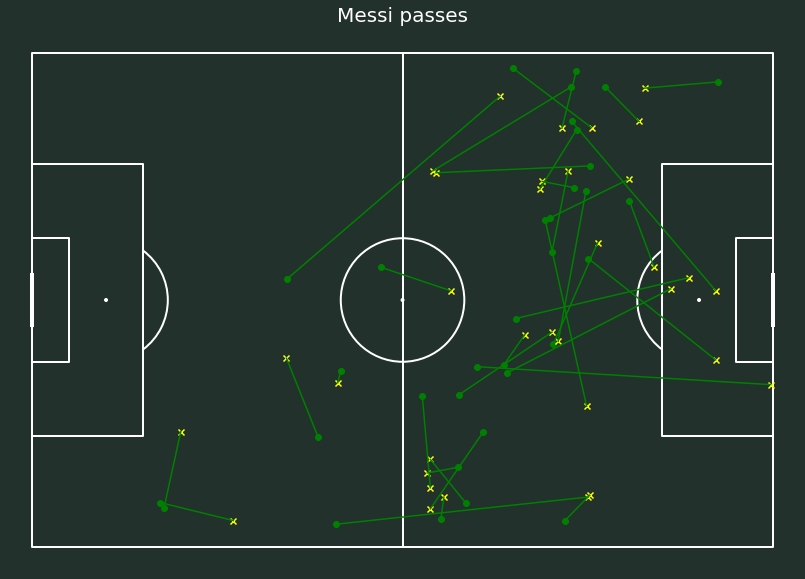

In [93]:
messi_passes = passes[(passes['player'] == "Lionel Andrés Messi Cuccittini")]

fig ,ax = plt.subplots(figsize=(16,10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Draw the pitch on the ax figure
pitch.draw(ax=ax)

plt.plot((messi_passes['pass_start_x'],messi_passes['pass_end_x']), (messi_passes['pass_start_y'], messi_passes['pass_end_y']), color='green')
plt.scatter(messi_passes['pass_start_x'], messi_passes['pass_start_y'], color='green')
plt.scatter(messi_passes['pass_end_x'], messi_passes['pass_end_y'], color='yellow', marker='x')

plt.title("Messi passes", color='white', size=20)

As seen above, Messi is great at finding gaps in the defence and will often put balls through the defensive center into the box. He also plays in the Right Midfield during build up play.

Text(0.5, 1.0, 'Messi carries')

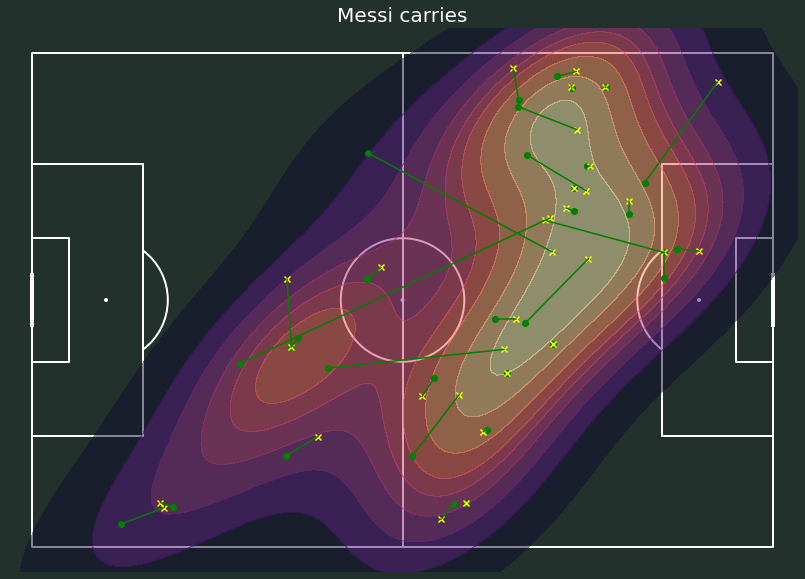

In [94]:
messi_carries = carries[(carries['team'] == 'Barcelona') & (carries['player'] == "Lionel Andrés Messi Cuccittini")]


fig ,ax = plt.subplots(figsize=(16,10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Draw the pitch on the ax figure
pitch.draw(ax=ax)

kde = sns.kdeplot(
        x=messi_carries['carry_start_x'],
        y=messi_carries['carry_start_y'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'magma'
)

plt.plot((messi_carries['carry_start_x'],messi_carries['carry_end_x']), (messi_carries['carry_start_y'], messi_carries['carry_end_y']), color='green')
plt.scatter(messi_carries['carry_start_x'], messi_carries['carry_start_y'], color='green')
plt.scatter(messi_carries['carry_end_x'], messi_carries['carry_end_y'], color='yellow', marker='x')

plt.title("Messi carries", color='white', size=20)

Although playing as a right winger in this match, we can see Messi carrying the ball between Madrid's midfielders and defenders like an attacking midfielder. 

Text(0.5, 1.0, 'Neymar passes')

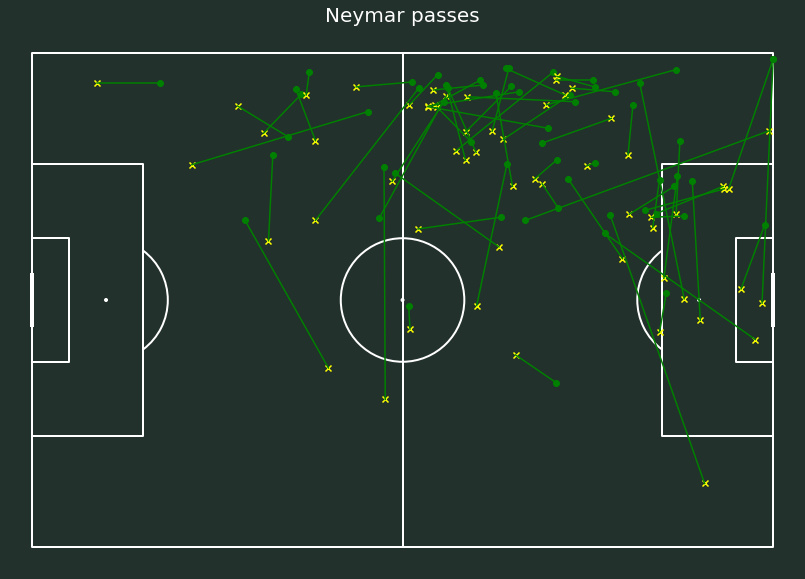

In [95]:
neymar_passes = passes[(passes['player'] == "Neymar da Silva Santos Junior")]

fig ,ax = plt.subplots(figsize=(16,10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Draw the pitch on the ax figure
pitch.draw(ax=ax)

plt.plot((neymar_passes['pass_start_x'],neymar_passes['pass_end_x']), (neymar_passes['pass_start_y'], neymar_passes['pass_end_y']), color='green')
plt.scatter(neymar_passes['pass_start_x'], neymar_passes['pass_start_y'], color='green')
plt.scatter(neymar_passes['pass_end_x'], neymar_passes['pass_end_y'], color='yellow', marker='x')

plt.title("Neymar passes", color='white', size=20)

Neymar plays like an aggressive left winger, often linking up with Iniesta behind him and Messi in the center. As seen above, he creates potential scoring chances by crossing the ball in.

Text(0.5, 1.0, 'Neymar carries')

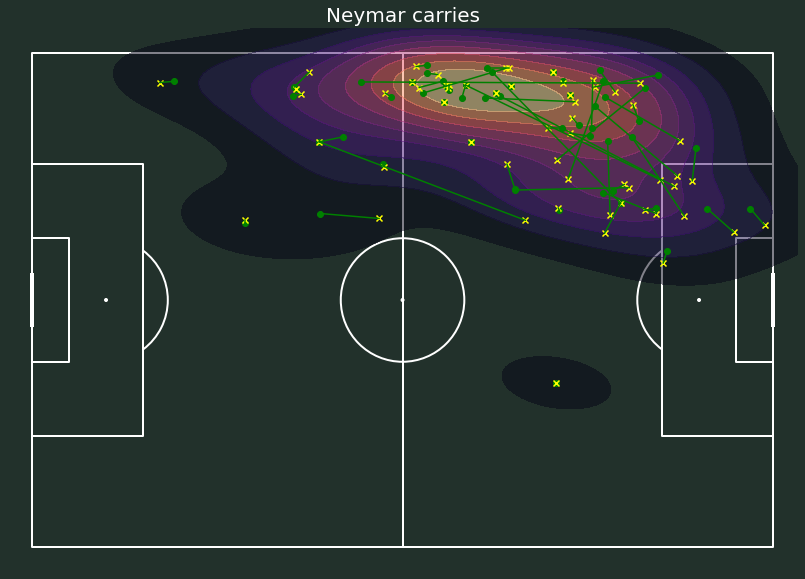

In [96]:
neymar_carries = carries[(carries['team'] == 'Barcelona') & (carries['player'] == "Neymar da Silva Santos Junior")]

fig ,ax = plt.subplots(figsize=(16,10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Draw the pitch on the ax figure
pitch.draw(ax=ax)

kde = sns.kdeplot(
        x=neymar_carries['carry_start_x'],
        y=neymar_carries['carry_start_y'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'magma'
)

plt.plot((neymar_carries['carry_start_x'],neymar_carries['carry_end_x']), (neymar_carries['carry_start_y'], neymar_carries['carry_end_y']), color='green')
plt.scatter(neymar_carries['carry_start_x'], neymar_carries['carry_start_y'], color='green')
plt.scatter(neymar_carries['carry_end_x'], neymar_carries['carry_end_y'], color='yellow', marker='x')

plt.title("Neymar carries", color='white', size=20)

To do:

* Create pass network between Messi, Neymar and Iniesta.
* Analyse Suarez's positioning and runs.